In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from pomegranate import DiscreteDistribution, HiddenMarkovModel

# Define transition matrix
transition_matrix = [[0.7, 0.2, 0.1],   # Transition probabilities from rainy
                     [0.3, 0.5, 0.2],   # Transition probabilities from cloudy
                     [0.1, 0.3, 0.6]]   # Transition probabilities from sunny

# Define emission observation probabilities
emission_probs = [{'rainy': 1.0}, {'cloudy': 1.0}, {'sunny': 1.0}]

# Create Hidden Markov Model
model = HiddenMarkovModel()

# Add states and transitions
for i, emission_prob in enumerate(emission_probs):
    distribution = DiscreteDistribution(emission_prob)
    state = HiddenMarkovModel(distribution)
    model.add_state(state)
    for j, prob in enumerate(transition_matrix[i]):
        model.add_transition(model.start if i == 0 else model.states[i - 1], state, prob)

# Bake the model
model.bake()

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for state in model.states:
    G.add_node(state.name)

# Add edges
for state in model.states:
    for next_state in state.edges:
        G.add_edge(state.name, next_state[0].name, weight=state.edges[next_state])

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)

# Show plot
plt.title("State Diagram for HbMM")
plt.show()


ModuleNotFoundError: No module named 'pomegranate'

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


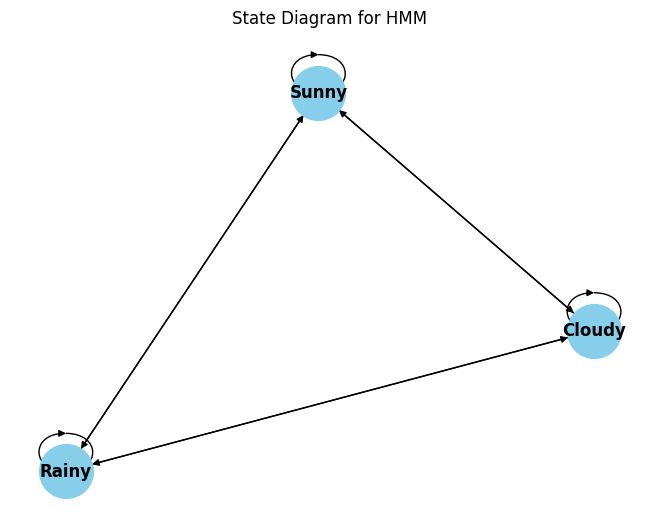

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from hmmlearn import hmm

# Define transition matrix
transition_matrix = np.array([[0.7, 0.2, 0.1],   # Transition probabilities from rainy
                              [0.3, 0.5, 0.2],   # Transition probabilities from cloudy
                              [0.1, 0.3, 0.6]])  # Transition probabilities from sunny

# Define emission observation probabilities
emission_probs = np.array([[1.0, 0.0, 0.0],   # Emission probabilities for rainy
                            [0.0, 1.0, 0.0],   # Emission probabilities for cloudy
                            [0.0, 0.0, 1.0]])  # Emission probabilities for sunny

# Create Hidden Markov Model
model = hmm.MultinomialHMM(n_components=3, n_iter=100, tol=0.01)

# Set parameters
model.startprob_ = np.array([1.0, 0.0, 0.0])  # Always start with rainy
model.transmat_ = transition_matrix
model.emissionprob_ = emission_probs

# Create a directed graph
G = nx.DiGraph()

# Add nodes
states = ['Rainy', 'Cloudy', 'Sunny']
for state in states:
    G.add_node(state)

# Add edges
for i, source in enumerate(states):
    for j, target in enumerate(states):
        transition_prob = transition_matrix[i, j]
        if transition_prob > 0:
            G.add_edge(source, target, weight=transition_prob)

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)

# Show plot
plt.title("State Diagram for HMM")
plt.show()


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


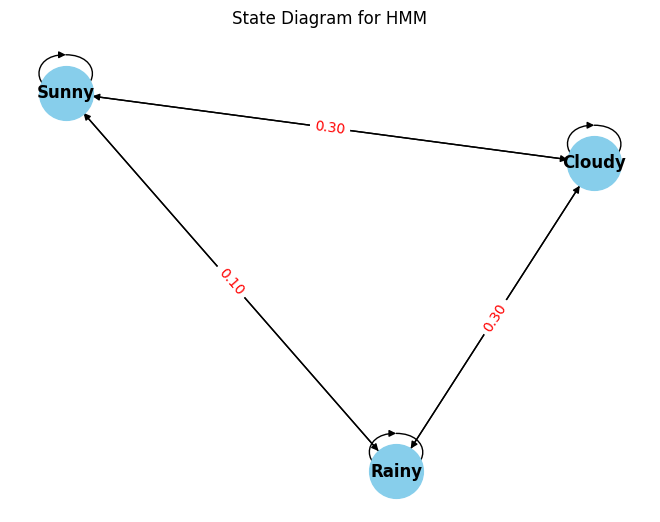

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from hmmlearn import hmm

# Define transition matrix
transition_matrix = np.array([[0.7, 0.2, 0.1],   # Transition probabilities from rainy
                              [0.3, 0.5, 0.2],   # Transition probabilities from cloudy
                              [0.1, 0.3, 0.6]])  # Transition probabilities from sunny

# Define emission observation probabilities
emission_probs = np.array([[1.0, 0.0, 0.0],   # Emission probabilities for rainy
                            [0.0, 1.0, 0.0],   # Emission probabilities for cloudy
                            [0.0, 0.0, 1.0]])  # Emission probabilities for sunny

# Create Hidden Markov Model
model = hmm.MultinomialHMM(n_components=3, n_iter=100, tol=0.01)

# Set parameters
model.startprob_ = np.array([1.0, 0.0, 0.0])  # Always start with rainy
model.transmat_ = transition_matrix
model.emissionprob_ = emission_probs

# Create a directed graph
G = nx.DiGraph()

# Add nodes
states = ['Rainy', 'Cloudy', 'Sunny']
for state in states:
    G.add_node(state)

# Add edges
for i, source in enumerate(states):
    for j, target in enumerate(states):
        transition_prob = transition_matrix[i, j]
        if transition_prob > 0:
            G.add_edge(source, target, weight=transition_prob)

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)

# Add edge labels
edge_labels = {(source, target): f"{G[source][target]['weight']:.2f}" for source, target in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show plot
plt.title("State Diagram for HMM")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from hmmlearn import hmm

# Define transition matrix
transition_matrix = np.array([[0.7, 0.2, 0.1],   # Transition probabilities from rainy
                              [0.3, 0.5, 0.2],   # Transition probabilities from cloudy
                              [0.1, 0.3, 0.6]])  # Transition probabilities from sunny

# Define emission observation probabilities
emission_probs = np.array([[1.0, 0.0, 0.0],   # Emission probabilities for rainy
                            [0.0, 1.0, 0.0],   # Emission probabilities for cloudy
                            [0.0, 0.0, 1.0]])  # Emission probabilities for sunny

# Create Hidden Markov Model
model = hmm.MultinomialHMM(n_components=3, n_iter=100, tol=0.01)

# Set parameters
model.startprob_ = np.array([1.0, 0.0, 0.0])  # Always start with rainy
model.transmat_ = transition_matrix
model.emissionprob_ = emission_probs

# Create a directed graph
G = nx.DiGraph()

# Add nodes
states = ['Rainy', 'Cloudy', 'Sunny']
for state in states:
    G.add_node(state)

# Add edges
for i, source in enumerate(states):
    for j, target in enumerate(states):
        transition_prob = transition_matrix[i, j]
        if transition_prob > 0:
            G.add_edge(source, target, weight=transition_prob)
        if i == j and transition_prob > 0:  # Add self-loop edge labels
            G.add_edge(source, target, weight=transition_prob)

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)

# Add edge labels
edge_labels = {(source, target): f"{G[source][target]['weight']:.2f}" for source, target in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show plot
plt.title("State Diagram for HMM")
plt.show()
